# A Demonstration of Multivariate Normal Imputation

Better than Mean Imputation and Regression Imputation

Shishir Rao  
December 21, 2025

When we have missing data in a dataset, we need to impute those missing values before we can use the data for analysis. There are several methods for imputing missing data, including mean imputation, regression imputation, and multivariate normal imputation. In this blog post, we will explore the advantages of multivariate normal imputation over mean imputation and regression imputation, and how to implement it using Bayesian modeling.

# Introduction

<figure>
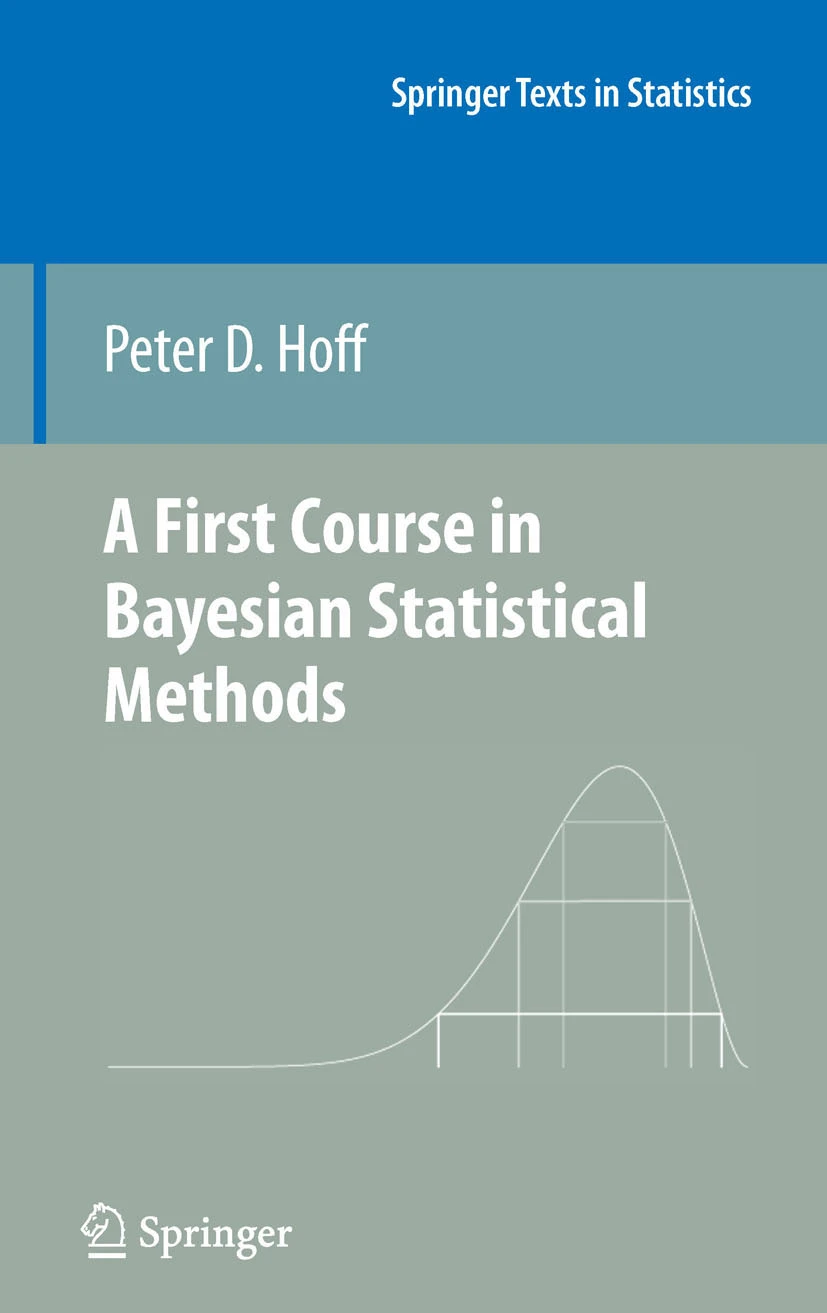
<figcaption>Hoff, P. D. (2009). A first course in Bayesian statistical methods. Springer. <a href="https://doi.org/10.1007/978-0-387-92407-6">https://doi.org/10.1007/978-0-387-92407-6</a></figcaption>
</figure>

Recently, I have been revisiting my notes from the course on Applied Bayesian Methods that I took in grad school. There is a chapter in the book on the Multivariate Normal model. One of the sections in the chapter discusses missing data and how to impute them using the Multivariate Normal model. An exercise problem at the end of the chapter asks to conduct a pairwise comparison of the means of two groups which contain missing data. First, the author suggests using regression imputation to impute the missing data in the dataset and then compare the means of the two groups using a pairwise t-test. Next, he suggests using the Multivariate Normal model to impute the missing data and then compare the means of the two groups. The results of the two methods lead to opposite conclusions. The t-test shows a significant result for the difference between the two groups when using regression imputation, but no significant difference was found when using the Multivariate Normal model for imputation. I thought this was an excellent example to illustrate the difference between multiple imputation using the Multivariate Normal model and single imputation methods like regression imputation, and why the former is a better method (under certain conditions).

In this blog, I pick another dataset for pairwise comparison using the t-test with regression imputation and Multivariate Normal imputation and discuss the results of the two methods.

# Dataset

For the purpose of this blog, we will use the Concrete Compressive Strength dataset available on the UC Irvine Machine Learning Repository website. The full dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)[1].

The actual concrete compressive strength (MPa) for a given mixture under a specific aga (days) was determined in the laboratory. We will compare the compressive strength on day 3 vs day 7. The strength on day 7 is expected to be higher than day 3 with a very high probability due to the nature of concrete. So, instead of testing for difference in means, we will test the hypothesis that the mean strength on day 7 is higher than day 3 by a certain margin (say 5 MPa).

A subset of the dataset with only the relevant columns for this analysis has been extracted. The table below shows the concrete strength for three different ages (in days) for each sample - day 3, day 7 and day 28. I have artificially introduced some missingness in the dataset to illustrate the imputation methods. Note that the missingness is Missing at Random (MAR). This means that the missingness is independent of the sample (and the parameters of the Multivariate Normal model that we will fit).

[1] Yeh, I. (1998). Concrete Compressive Strength. UCI Machine Learning Repository. https://doi.org/10.24432/C5PK67.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows

# Usage

## Arbitrary Margin Content

You can include anything in the margin by places the class `.column-margin` on the element. See an example on the right about the first fundamental theorem of calculus.

We know from *the first fundamental theorem of calculus* that for $x$ in $[a, b]$:

$$\frac{d}{dx}\left( \int_{a}^{x} f(u)\,du\right)=f(x).$$

## Arbitrary Full Width Content

Any content can span to the full width of the page, simply place the element in a `div` and add the class `column-page-right`. For example, the following code will display its contents as full width.

``` md
::: {.fullwidth}
Any _full width_ content here.
:::
```

# Acknowledgements

Thanks to the Quarto and Typst teams for these wonderful tools. This format is made possible by [Quarto’s](https://github.com/quarto-dev/quarto-cli/discussions?discussions_q=author%3Afredguth) and [Typst’s](https://discord.gg/2uDybryKPe) communities. Special thanks to:

-   Mickaël Canouil (`@mcanouil`);
-   Gordon Woodhull (`@gordonwoodhull`);
-   Charles Teague (`@dragonstyle`);
-   Raniere Silva (`@rgaiacs`); and
-   Christophe Dervieux (`@cderv`)
-   `@pgsuper`